In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

df = pd.read_excel('/content/drive/MyDrive/CS418/Milestone/all_alpha_23.xlsx')
df.fillna(0, inplace=True)
before = df.shape
df = df.drop(columns=['Trans','Cert Region', 'Stnd','Stnd Description', 
                      'Underhood ID', 'City MPG', 'Hwy MPG', 'Cmb MPG', 'SmartWay'])
df = df.reset_index(drop=True)
after = df.shape
print("before cleaning:", before)
print("after cleaning:", after)
df.to_csv('clean_all_alpha_23.csv',index=False)
df


before cleaning: (2539, 18)
after cleaning: (2539, 9)


,Model,Displ,Cyl,Drive,Fuel,Veh Class,Air Pollution Score,Greenhouse Gas Score,Comb CO2
0,ACURA Integra,1.5,4.0,2WD,Gasoline,large car,7,6,269
1,ACURA Integra,1.5,4.0,2WD,Gasoline,large car,7,6,269
2,ACURA Integra A-Spec,1.5,4.0,2WD,Gasoline,large car,6,6,293
3,ACURA Integra A-Spec,1.5,4.0,2WD,Gasoline,large car,6,6,293
4,ACURA Integra A-Spec,1.5,4.0,2WD,Gasoline,large car,7,6,277
...,...,...,...,...,...,...,...,...,...
2534,VOLVO XC90 B5,2.0,4.0,4WD,Gasoline,standard SUV,5,5,358
2535,VOLVO XC90 B6,2.0,4.0,4WD,Gasoline,standard SUV,7,5,401
2536,VOLVO XC90 B6,2.0,4.0,4WD,Gasoline,standard SUV,7,5,401
2537,VOLVO XC90 T8 Recharge,2.0,4.0,4WD,Gasoline/Electricity,standard SUV,7,9,137


                       Model  Displ  Cyl Drive                  Fuel  \
0              ACURA Integra    1.5  4.0   2WD              Gasoline   
1              ACURA Integra    1.5  4.0   2WD              Gasoline   
2       ACURA Integra A-Spec    1.5  4.0   2WD              Gasoline   
3       ACURA Integra A-Spec    1.5  4.0   2WD              Gasoline   
4       ACURA Integra A-Spec    1.5  4.0   2WD              Gasoline   
...                      ...    ...  ...   ...                   ...   
2534           VOLVO XC90 B5    2.0  4.0   4WD              Gasoline   
2535           VOLVO XC90 B6    2.0  4.0   4WD              Gasoline   
2536           VOLVO XC90 B6    2.0  4.0   4WD              Gasoline   
2537  VOLVO XC90 T8 Recharge    2.0  4.0   4WD  Gasoline/Electricity   
2538  VOLVO XC90 T8 Recharge    2.0  4.0   4WD  Gasoline/Electricity   

         Veh Class  Air Pollution Score  Greenhouse Gas Score Comb CO2  
0        large car                    7                     6 

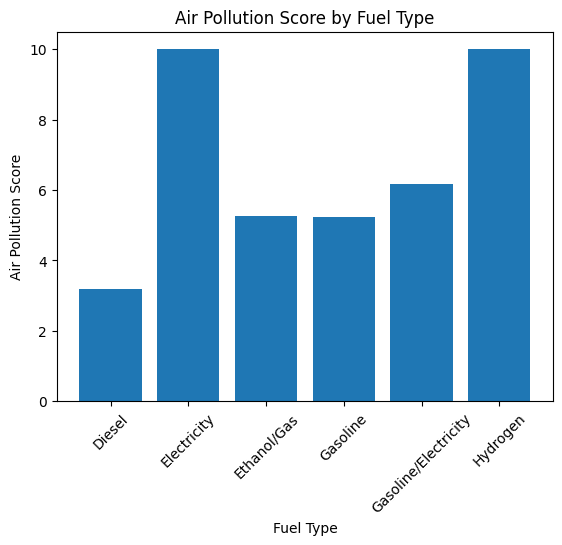

                   Fuel  Greenhouse Gas Score
0                Diesel              4.136364
1           Electricity             10.000000
2           Ethanol/Gas              3.625000
3              Gasoline              4.554125
4  Gasoline/Electricity              8.365854
5              Hydrogen             10.000000
                   Fuel  Greenhouse Gas Score
0                Diesel                   182
1           Electricity                  2740
2           Ethanol/Gas                   116
3              Gasoline                  9550
4  Gasoline/Electricity                   686
5              Hydrogen                   100


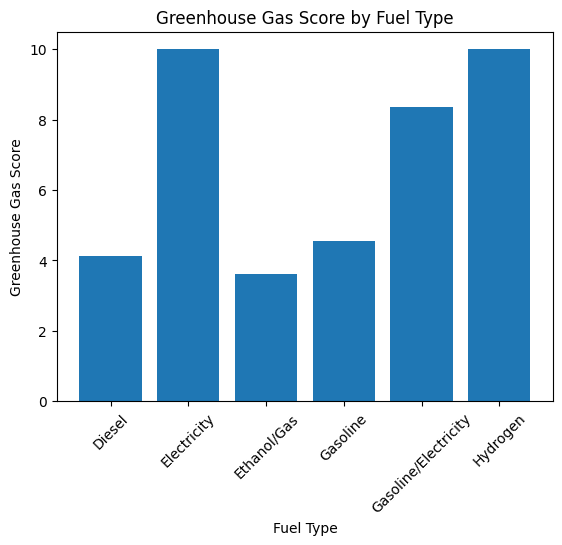

                   Fuel       Comb CO2
0                Diesel  1.005551e+130
1           Electricity   0.000000e+00
2           Ethanol/Gas   4.720000e+02
3              Gasoline            inf
4  Gasoline/Electricity  1.806686e+229
5              Hydrogen   0.000000e+00
                   Fuel                                           Comb CO2
0                Diesel  4424424624623963964234254234254634634424424624...
1           Electricity  0000000000000000000000000000000000000000000000...
2           Ethanol/Gas                                            15104.0
3              Gasoline  2692692932932772774114114234234744743703703853...
4  Gasoline/Electricity  1481482222222512511581581721721791792032031771...
5              Hydrogen                                         0000000000


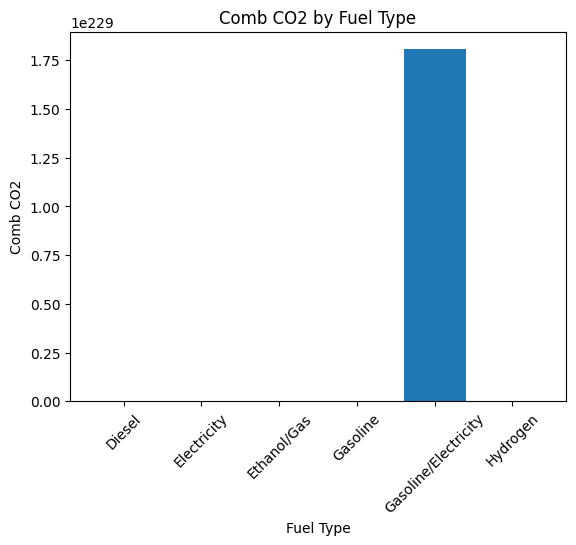

In [14]:
for i, value in enumerate(df['Comb CO2']):
    if type(value) == str and '/' in value:
        num1, num2 = value.split('/')
        mean = (int(num1) + int(num2)) / 2
        df.at[i, 'Comb CO2'] = mean
print(df)
columns = ['Air Pollution Score','Greenhouse Gas Score', 'Comb CO2']
for column in columns:

  fuel_data = df.groupby('Fuel')[column].mean().reset_index()
  fuel_data2 = df.groupby('Fuel')[column].sum().reset_index()
  print(fuel_data)
  print(fuel_data2)
  plt.bar(fuel_data['Fuel'], fuel_data[column])
  plt.xlabel('Fuel Type')
  plt.ylabel(column)
  plt.title(column + ' by Fuel Type')
  plt.xticks(rotation=45)
  plt.show()

      Displ  Cyl                  Fuel  Air Pollution Score  \
0       1.5  4.0              Gasoline                    7   
1       1.5  4.0              Gasoline                    7   
2       1.5  4.0              Gasoline                    6   
3       1.5  4.0              Gasoline                    6   
4       1.5  4.0              Gasoline                    7   
...     ...  ...                   ...                  ...   
2534    2.0  4.0              Gasoline                    5   
2535    2.0  4.0              Gasoline                    7   
2536    2.0  4.0              Gasoline                    7   
2537    2.0  4.0  Gasoline/Electricity                    7   
2538    2.0  4.0  Gasoline/Electricity                    7   

      Greenhouse Gas Score Comb CO2  
0                        6      269  
1                        6      269  
2                        6      293  
3                        6      293  
4                        6      277  
...            

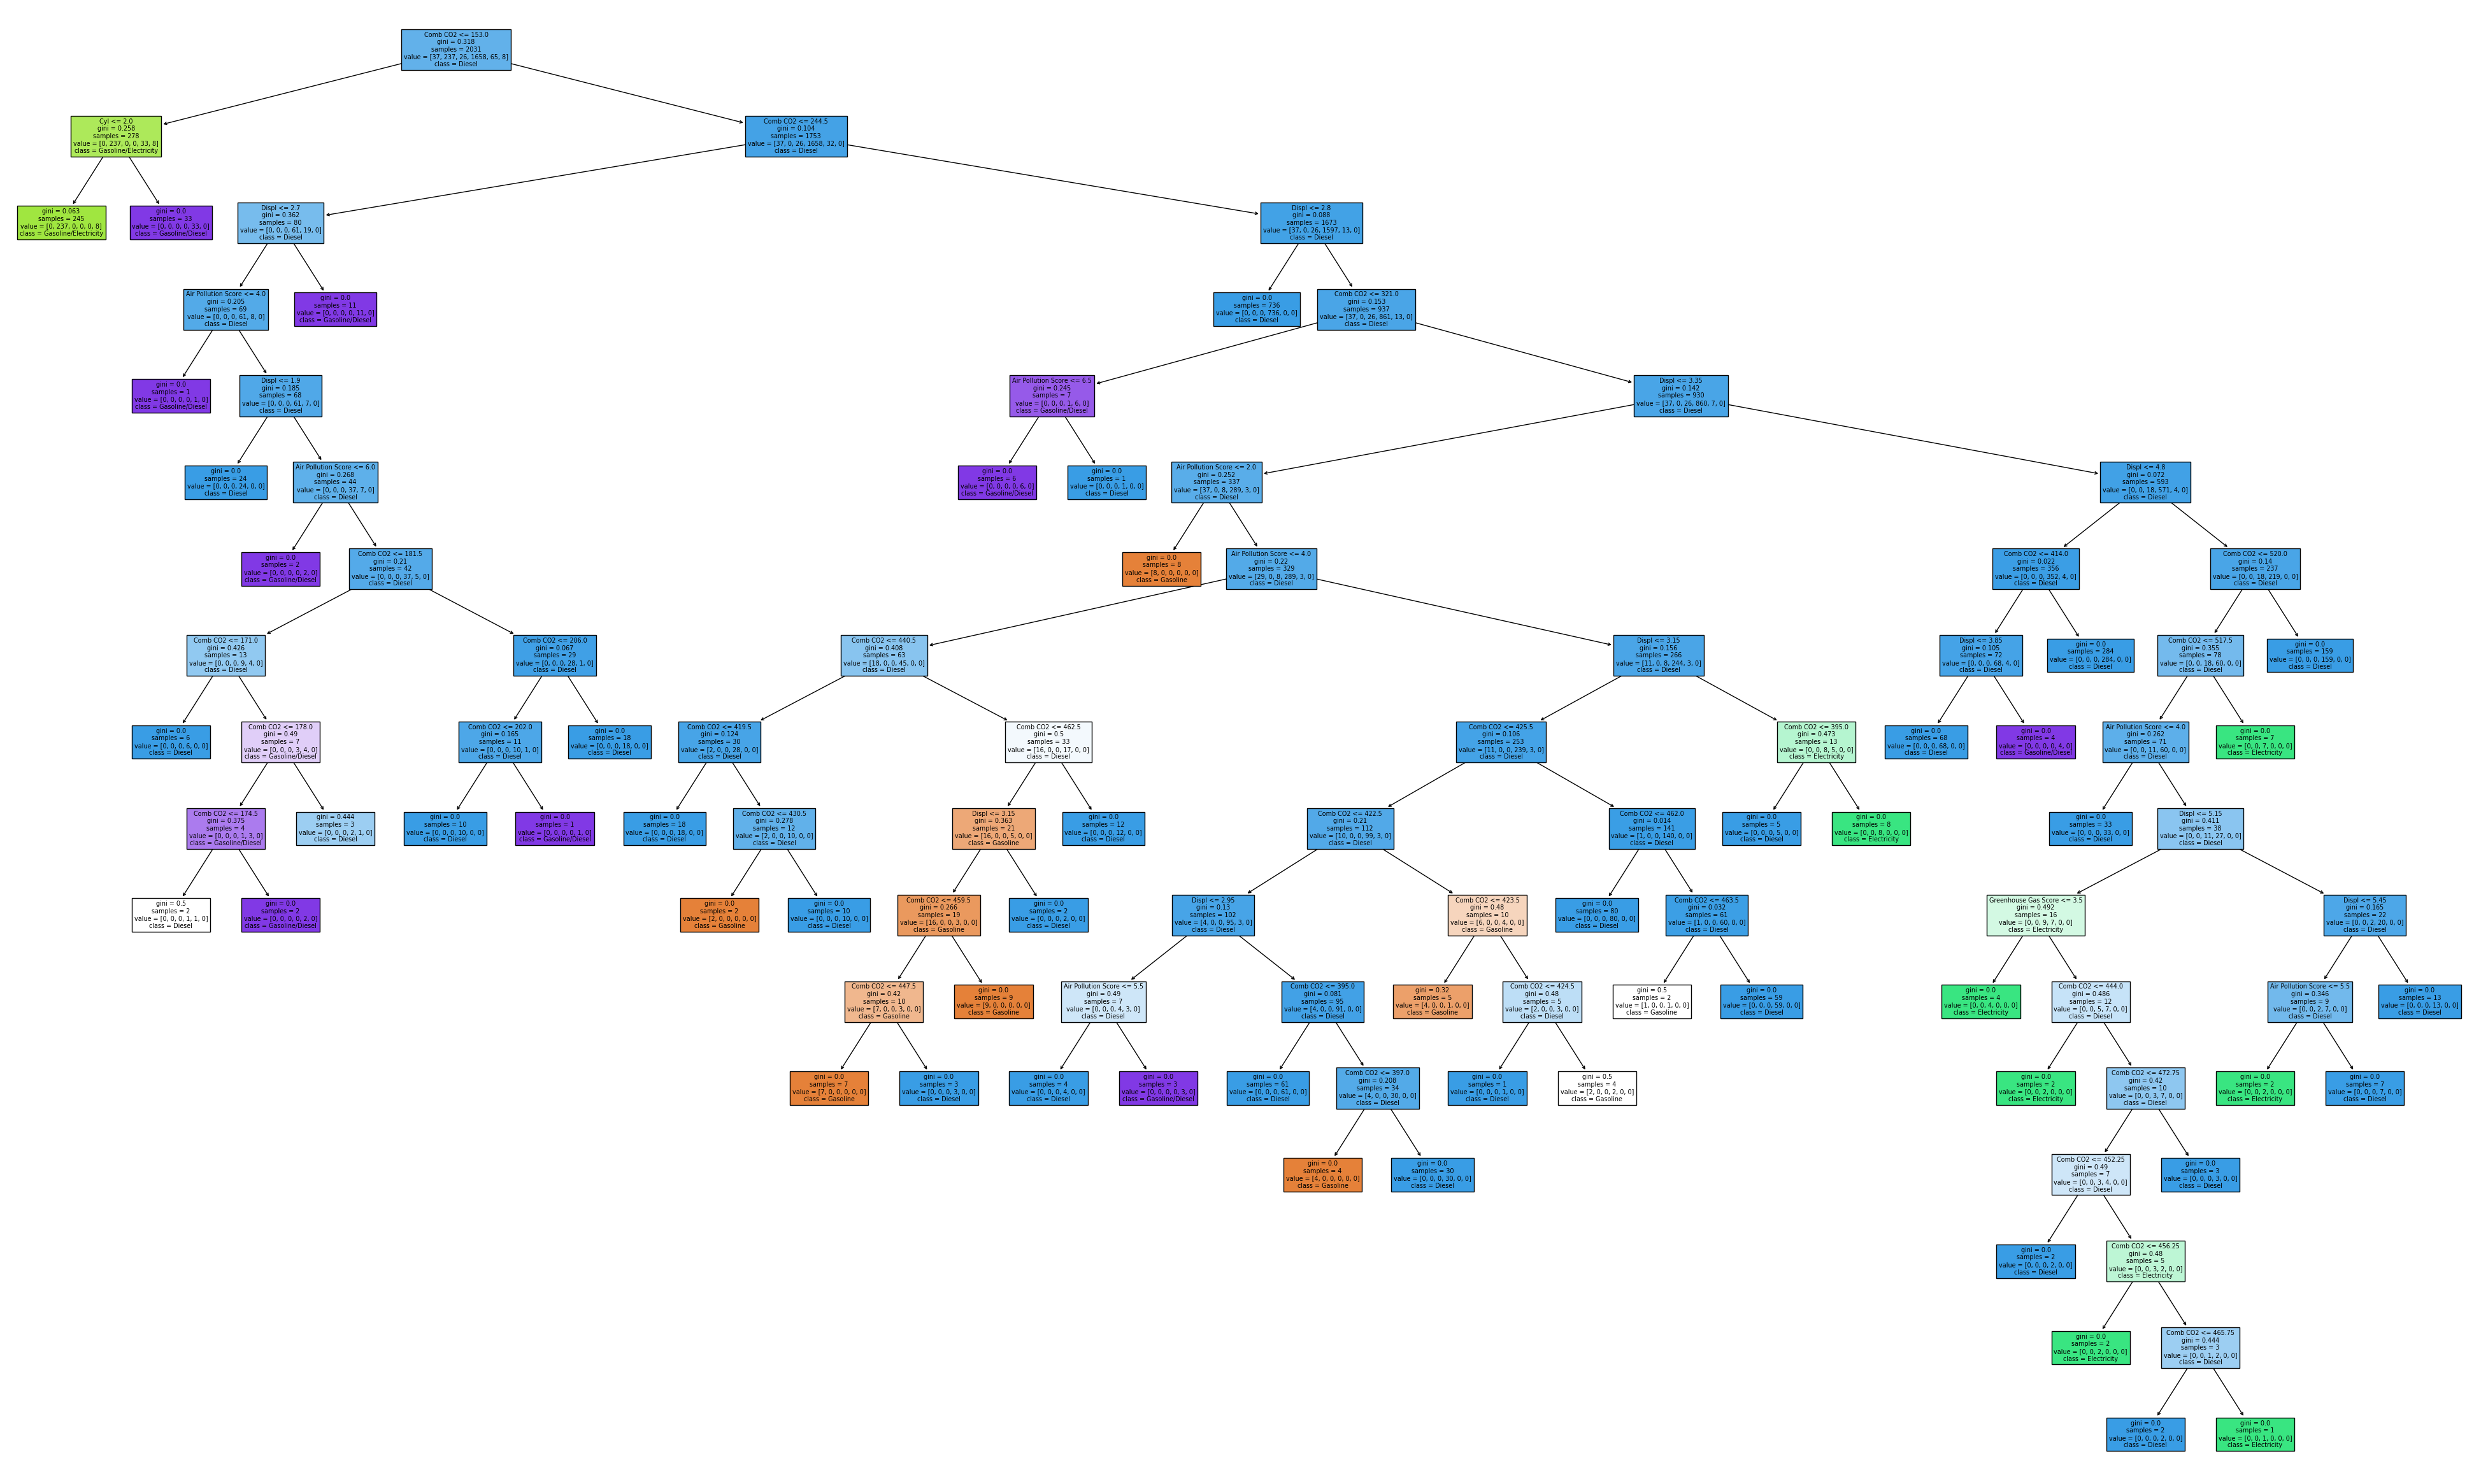

Accuracy: 0.984251968503937


In [15]:
data = df.drop(columns=['Model', 'Drive','Veh Class'])
for i, value in enumerate(data['Comb CO2']):
    if type(value) == str and '/' in value:
        num1, num2 = value.split('/')
        mean = (int(num1) + int(num2)) / 2
        df.at[i, 'Comb CO2'] = mean
print(data)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=["Fuel"]), data["Fuel"], test_size=0.2, random_state=42)
# Create decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# value = data.iloc[data['Comb CO2'].astype(int),data['Air Pollution Score'].astype(int)]
class_names = ['Gasoline', 'Gasoline/Electricity', 'Electricity', 'Diesel', 'Gasoline/Diesel']
# Train model
clf.fit(X_train, y_train)
# Make predictions on test set
y_pred = clf.predict(X_test)
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
plt.figure(figsize=(50,30))
plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=class_names)
plt.show()
print("Accuracy:", accuracy)

In [16]:
# data = df
# # print(data)
# for i, value in enumerate(df['Comb CO2']):
#     if type(value) == str and '/' in value:
#         num1, num2 = value.split('/')
#         mean = (int(num1) + int(num2)) / 2
#         df.at[i, 'Comb CO2'] = mean
# data